# EDA on Infant Cries Dataset

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import shutil
import tensorflow as tf
import zipfile


from sklearn.model_selection import train_test_split

## Loading dataset

In [2]:
# Get the current working directory
current_directory = os.getcwd()

# Get the parent directory by using os.path.dirname()
parent_directory = os.path.dirname(current_directory)

folder_name = "data"

# Construct the path to the desired folder using os.path.join()
desired_folder_path = os.path.join(parent_directory, folder_name)

print("Current directory (parent directory):", desired_folder_path)

os.chdir(desired_folder_path)

# Check the new current directory (parent directory)
current_directory = os.getcwd()

# List all files and directories in the specified directory
files_and_directories = os.listdir(current_directory)

# Filter out only the files from the list
files = [file for file in files_and_directories if os.path.isfile(os.path.join(current_directory, file))]

# Print the list of files
print(files)

Current directory (parent directory): d:\UMBC\606\codes\manideep_data606\data
['donateacry_corpus_cleaned_and_updated_data.zip']


In [3]:
zip_file_path = os.path.join(current_directory, files[0])
extracted_dir = os.path.join(parent_directory, 'temp')

if os.path.exists(extracted_dir):
    shutil.rmtree(extracted_dir)

os.makedirs(extracted_dir)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

## Preparing dataset for EDA

In [4]:
def list_files(folder_path):
    file_list = []

    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            file_list.append(file_path)

    return file_list

# Provide the path to the folder you want to list files from
folder_path = os.path.join(extracted_dir,"donateacry_corpus_cleaned_and_updated_data")

# Call the function to list the files
files = list_files(folder_path)

print('Total number of files:', len(files))

Total number of files: 457


### Extracting Gender, Age and reason for cry from filename and duration of the file by loading the file to librosa

In [5]:
def get_duration(filename):
    audio_data, sample_rate = librosa.load(filename)
    audio_duration = librosa.get_duration(y=audio_data, sr=sample_rate)
    return audio_duration

df = pd.DataFrame(files, columns=['filename'])

# Splitting the string into separate columns and extracting the last three columns
df[['gender', 'age', 'label']] = df['filename'].str.split('-', expand=True).iloc[:, -3:]

df['duration'] = df['filename'].apply(get_duration)
df['label'] = df['label'].apply(lambda x: x.split('.')[0])

print(df)

                                              filename gender age label  \
0    d:\UMBC\606\codes\manideep_data606\temp\donate...      m  48    bp   
1    d:\UMBC\606\codes\manideep_data606\temp\donate...      m  72    bp   
2    d:\UMBC\606\codes\manideep_data606\temp\donate...      m  72    bp   
3    d:\UMBC\606\codes\manideep_data606\temp\donate...      m  72    bp   
4    d:\UMBC\606\codes\manideep_data606\temp\donate...      m  72    bp   
..                                                 ...    ...  ..   ...   
452  d:\UMBC\606\codes\manideep_data606\temp\donate...      f  04    ti   
453  d:\UMBC\606\codes\manideep_data606\temp\donate...      m  04    ti   
454  d:\UMBC\606\codes\manideep_data606\temp\donate...      m  04    ti   
455  d:\UMBC\606\codes\manideep_data606\temp\donate...      m  04    ti   
456  d:\UMBC\606\codes\manideep_data606\temp\donate...      f  26    ti   

     duration  
0        6.86  
1        7.00  
2        7.00  
3        7.00  
4        7.00  
.. 

## Understanding data

### checking null values and shape of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  457 non-null    object 
 1   gender    457 non-null    object 
 2   age       457 non-null    object 
 3   label     457 non-null    object 
 4   duration  457 non-null    float64
dtypes: float64(1), object(4)
memory usage: 18.0+ KB


### Verifying extracted age column to contain only below identified values
- 04 - 0 to 4 weeks old
- 48 - 4 to 8 weeks old
- 26 - 2 to 6 months old
- 72 - 7 month to 2 years old
- 22 - more than 2 years old

In [7]:
df.age.unique()

array(['48', '72', '26', '04', '22'], dtype=object)

### Verifying extracted gender column to contain only below identified values
- m - male
- f - female

In [8]:
df.gender.unique()

array(['m', 'f'], dtype=object)

### Verifying extracted label column to contain only below identified values
- hu - hungry
- bu - needs burping
- bp - belly pain
- dc - discomfort
- ti - tired
- lo - lonely
- ch - cold/hot
- sc - scared
- dk - don't know

In [9]:
df.label.unique()

array(['bp', 'bu', 'dc', 'ch', 'hu', 'ti'], dtype=object)

### Verifying duration of all the files is nearly same

In [10]:
df.duration.unique()

array([6.86, 7.  , 6.9 , 6.96, 6.82, 6.84, 6.66, 6.54, 6.68, 7.06, 6.94,
       6.98, 6.78, 6.92, 6.88, 6.72, 7.04, 6.74, 6.76, 6.62, 6.64, 7.02,
       6.52])

### Understanding distribution of genders

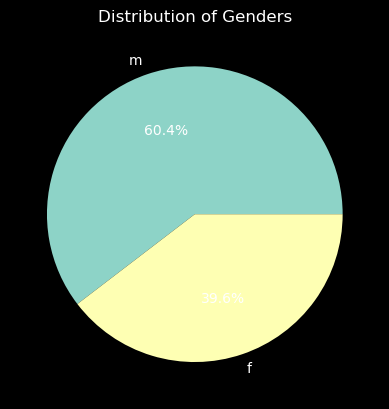

In [11]:
# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Create a pie chart using Seaborn
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Genders')
plt.show()

### Understanding distribution of age

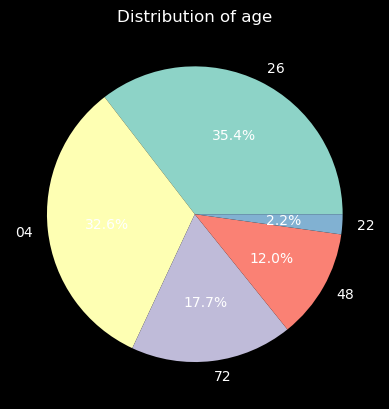

In [12]:
# Count the occurrences of each age
gender_counts = df['age'].value_counts()

# Create a pie chart using Seaborn
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of age')
plt.show()

### Understanding distribution of label

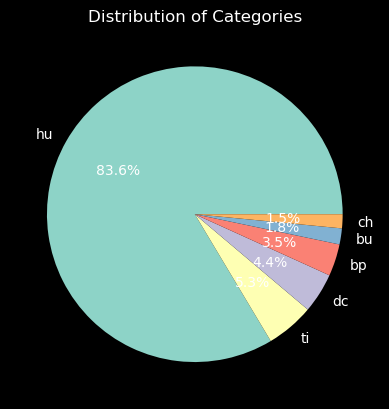

In [13]:
# Count the occurrences of each label
gender_counts = df['label'].value_counts()

# Create a pie chart using Seaborn
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

### Understanding Relationship between Gender and Label

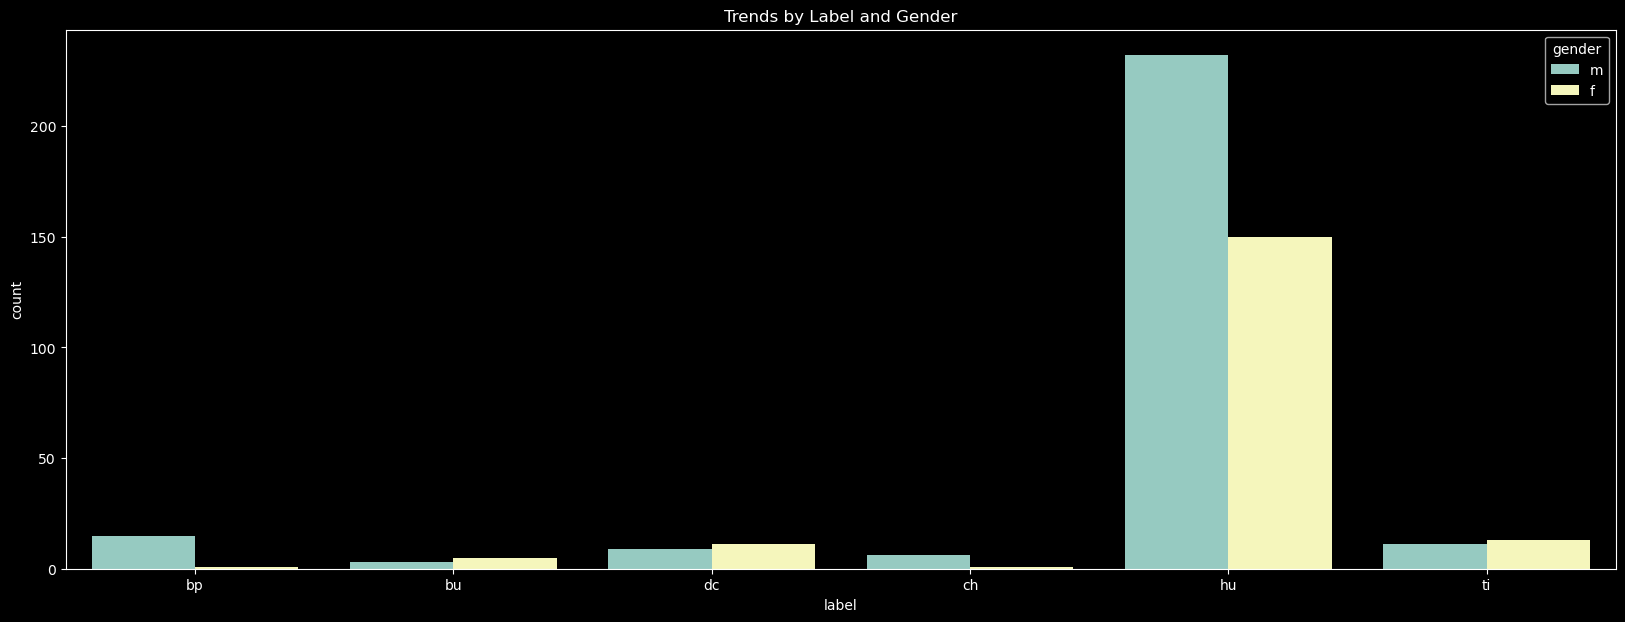

In [14]:
f,ax=plt.subplots(1,1,figsize=(20,7))
sns.countplot(x="label", hue="gender", data=df, ax=ax)
plt.title('Trends by Label and Gender')
plt.show()

### Understanding Relationship between Age and Label

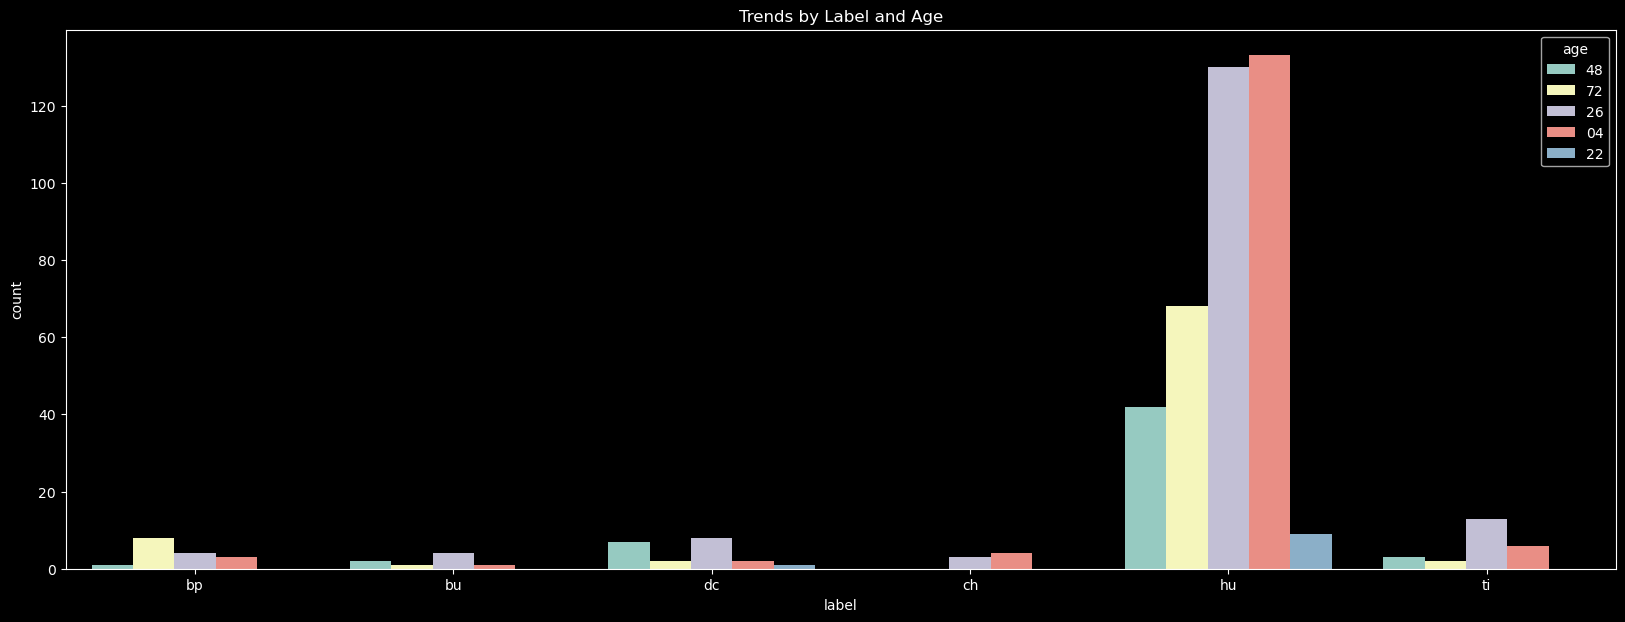

In [15]:
f,ax=plt.subplots(1,1,figsize=(20,7))
sns.countplot(x="label", hue="age", data=df, ax=ax)
plt.title('Trends by Label and Age')
plt.show()

### 2D image representation of a baby cry

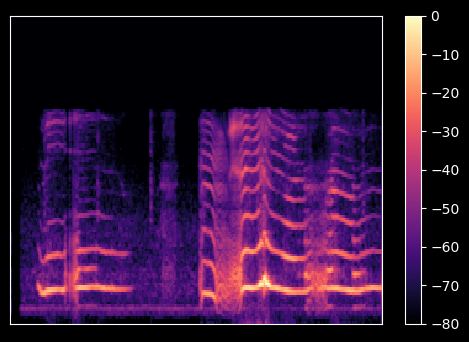

In [16]:
fname = files[23]
samples, sample_rate = librosa.load(fname)

fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
plt.colorbar()
plt.show()

In [48]:
S.shape

(128, 302)

### Feature Extraction

In [26]:
def get_features(filename):
  try:
    audio_data, sample_rate = librosa.load(filename)
    S = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    fill = 305 - S.shape[1]
    if fill > 0:
      S = np.concatenate((S, np.zeros((128, fill))), axis=1)
    return S
  except Exception as e:
    print(f"Error processing {filename}: {e}")
    return None

df['features'] = df['filename'].apply(get_features)

In [28]:
df

,filename,gender,age,label,duration,features
0,d:\UMBC\606\codes\manideep_data606\temp\donate...,m,48,bp,6.86,"[[1.1270191002665797e-08, 5.836095162692345e-0..."
1,d:\UMBC\606\codes\manideep_data606\temp\donate...,m,72,bp,7.00,"[[2.164261331927264e-06, 2.674506959010614e-06..."
2,d:\UMBC\606\codes\manideep_data606\temp\donate...,m,72,bp,7.00,"[[5.047741433372721e-05, 2.1598061721306294e-0..."
3,d:\UMBC\606\codes\manideep_data606\temp\donate...,m,72,bp,7.00,"[[2.2012220142642036e-05, 1.726540722302161e-0..."
4,d:\UMBC\606\codes\manideep_data606\temp\donate...,m,72,bp,7.00,"[[0.0036527409683912992, 0.002167423954233527,..."
...,...,...,...,...,...,...
452,d:\UMBC\606\codes\manideep_data606\temp\donate...,f,04,ti,6.88,"[[3.704298796947114e-05, 0.0006461103912442923..."
453,d:\UMBC\606\codes\manideep_data606\temp\donate...,m,04,ti,6.82,"[[4.8018076626021866e-08, 1.0169576114549272e-..."
454,d:\UMBC\606\codes\manideep_data606\temp\donate...,m,04,ti,6.82,"[[1.4625798030465376e-06, 1.84240536782454e-06..."
455,d:\UMBC\606\codes\manideep_data606\temp\donate...,m,04,ti,6.84,"[[2.541839876357699e-06, 4.242699105816428e-06..."


### Partitioning Dataset

In [30]:
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

# Convert labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['label'])

# One-Hot Encoding
mlb = MultiLabelBinarizer()
y_one_hot = mlb.fit_transform([[label] for label in y_encoded])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['features'], y_one_hot, test_size=0.2, random_state=42)

# Convert the arrays to numpy and expand dimensions for TensorFlow
X_train = np.stack(X_train.to_numpy()).astype(np.float32)
X_test = np.stack(X_test.to_numpy()).astype(np.float32)

In [31]:
def compute_class_weights(labels):
    class_counts = np.sum(labels, axis=0)
    total_samples = labels.shape[0]
    class_weights = {class_index: total_samples / class_counts[class_index] for class_index in range(len(class_counts))}
    return class_weights

class_weights = compute_class_weights(y_one_hot)

print(class_weights)

{0: 28.5625, 1: 57.125, 2: 65.28571428571429, 3: 22.85, 4: 1.1963350785340314, 5: 19.041666666666668}


### Building the CNN

#### Simple CNN

In [32]:
# Define the CNN model
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 305, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
12/12 [==============================] - 6s 483ms/step - loss: 46.5749 - accuracy: 0.6603 - val_loss: 12.4657 - val_accuracy: 0.6630
Epoch 2/10
12/12 [==============================] - 6s 480ms/step - loss: 3.0286 - accuracy: 0.8767 - val_loss: 14.6069 - val_accuracy: 0.7717
Epoch 3/10
12/12 [==============================] - 6s 494ms/step - loss: 1.0280 - accuracy: 0.9151 - val_loss: 13.0217 - val_accuracy: 0.7717
Epoch 4/10
12/12 [==============================] - 6s 507ms/step - loss: 0.3400 - accuracy: 0.9342 - val_loss: 11.9845 - val_accuracy: 0.7609
Epoch 5/10
12/12 [==============================] - 6s 497ms/step - loss: 0.2314 - accuracy: 0.9425 - val_loss: 12.0865 - val_accuracy: 0.7609
Epoch 6/10
12/12 [==============================] - 6s 539ms/step - loss: 0.1892 - accuracy: 0.9452 - val_loss: 11.7527 - val_accuracy: 0.7609
Epoch 7/10
12/12 [==============================] - 6s 488ms/step - loss: 0.1495 - accuracy: 0.9452 - val_loss: 11.4114 - val_accuracy: 0.760

#### CNN with multiple convolution layers

In [34]:
# Define the CNN model
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 305, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model2.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
12/12 [==============================] - 8s 648ms/step - loss: 9.8410 - accuracy: 0.7068 - val_loss: 1.9121 - val_accuracy: 0.6630
Epoch 2/10
12/12 [==============================] - 9s 728ms/step - loss: 1.0767 - accuracy: 0.8274 - val_loss: 1.4503 - val_accuracy: 0.7826
Epoch 3/10
12/12 [==============================] - 8s 639ms/step - loss: 0.7652 - accuracy: 0.8849 - val_loss: 2.1109 - val_accuracy: 0.7826
Epoch 4/10
12/12 [==============================] - 8s 629ms/step - loss: 0.4613 - accuracy: 0.8822 - val_loss: 2.1044 - val_accuracy: 0.7826
Epoch 5/10
12/12 [==============================] - 8s 705ms/step - loss: 0.2956 - accuracy: 0.9068 - val_loss: 2.0594 - val_accuracy: 0.7826
Epoch 6/10
12/12 [==============================] - 8s 669ms/step - loss: 0.2432 - accuracy: 0.9205 - val_loss: 2.4804 - val_accuracy: 0.7609
Epoch 7/10
12/12 [==============================] - 7s 620ms/step - loss: 0.1950 - accuracy: 0.9397 - val_loss: 3.1086 - val_accuracy: 0.7500
Epoch 

#### CNN with Dropout Regularization

In [35]:
# Define the CNN model with Dropout regularization
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 305, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Added Dropout regularization
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Added Dropout regularization
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model3.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
12/12 [==============================] - 10s 759ms/step - loss: 74.4886 - accuracy: 0.6466 - val_loss: 19.0572 - val_accuracy: 0.7283
Epoch 2/10
12/12 [==============================] - 9s 755ms/step - loss: 4.1005 - accuracy: 0.8274 - val_loss: 3.5911 - val_accuracy: 0.7609
Epoch 3/10
12/12 [==============================] - 8s 681ms/step - loss: 0.5114 - accuracy: 0.8932 - val_loss: 2.1423 - val_accuracy: 0.7826
Epoch 4/10
12/12 [==============================] - 8s 705ms/step - loss: 0.3811 - accuracy: 0.8904 - val_loss: 1.8812 - val_accuracy: 0.7826
Epoch 5/10
12/12 [==============================] - 9s 730ms/step - loss: 0.3307 - accuracy: 0.8986 - val_loss: 1.8551 - val_accuracy: 0.7826
Epoch 6/10
12/12 [==============================] - 9s 736ms/step - loss: 0.2610 - accuracy: 0.9123 - val_loss: 1.9428 - val_accuracy: 0.7826
Epoch 7/10
12/12 [==============================] - 10s 812ms/step - loss: 0.2379 - accuracy: 0.9260 - val_loss: 2.0473 - val_accuracy: 0.7609
Ep

In [36]:
from sklearn.metrics import classification_report

# Evaluate the model on test data
y_pred = model3.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Create the classification report
report = classification_report(y_true, y_pred, zero_division=1)
print(report)

3/3 [==============================] - 1s 120ms/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         4
           1       1.00      0.00      0.00         2
           2       1.00      0.00      0.00         2
           3       1.00      0.00      0.00         5
           4       0.78      0.99      0.87        72
           5       0.00      0.00      0.00         7

    accuracy                           0.77        92
   macro avg       0.80      0.16      0.15        92
weighted avg       0.75      0.77      0.68        92

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4]


#### CNN with Dropout regularization and Exponential Decay Learning rate scheduler

In [38]:
# Define the CNN model with Dropout regularization
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 305, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Added Dropout regularization
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Added Dropout regularization
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Define the learning rate scheduler
lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.5
)

# Compile the model with the learning rate scheduler
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_scheduler),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model4.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model4.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
12/12 [==============================] - 10s 748ms/step - loss: 280.1999 - accuracy: 0.6877 - val_loss: 1.5010 - val_accuracy: 0.7283
Epoch 2/10
12/12 [==============================] - 9s 758ms/step - loss: 1.2555 - accuracy: 0.8274 - val_loss: 1.1115 - val_accuracy: 0.7717
Epoch 3/10
12/12 [==============================] - 9s 722ms/step - loss: 0.9097 - accuracy: 0.8247 - val_loss: 1.0828 - val_accuracy: 0.7826
Epoch 4/10
12/12 [==============================] - 8s 684ms/step - loss: 0.7352 - accuracy: 0.8466 - val_loss: 0.8834 - val_accuracy: 0.7826
Epoch 5/10
12/12 [==============================] - 8s 667ms/step - loss: 0.6370 - accuracy: 0.8548 - val_loss: 0.9057 - val_accuracy: 0.7826
Epoch 6/10
12/12 [==============================] - 8s 653ms/step - loss: 0.4637 - accuracy: 0.8740 - val_loss: 1.1878 - val_accuracy: 0.7826
Epoch 7/10
12/12 [==============================] - 9s 744ms/step - loss: 0.4152 - accuracy: 0.8767 - val_loss: 1.3258 - val_accuracy: 0.7826
Epo

#### CNN with class_weight to address imbalance dataset

In [40]:
# Define the CNN model with Dropout regularization
model6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 305, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Added Dropout regularization
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model6.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights)

# Evaluate the model
loss, accuracy = model6.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/50
12/12 [==============================] - 11s 882ms/step - loss: 192.5771 - accuracy: 0.1534 - val_loss: 2.5877 - val_accuracy: 0.5326
Epoch 2/50
12/12 [==============================] - 10s 802ms/step - loss: 14.5924 - accuracy: 0.5425 - val_loss: 2.3447 - val_accuracy: 0.2935
Epoch 3/50
12/12 [==============================] - 11s 933ms/step - loss: 10.6622 - accuracy: 0.5452 - val_loss: 2.4844 - val_accuracy: 0.1848
Epoch 4/50
12/12 [==============================] - 10s 854ms/step - loss: 7.5833 - accuracy: 0.2548 - val_loss: 2.2577 - val_accuracy: 0.2500
Epoch 5/50
12/12 [==============================] - 10s 853ms/step - loss: 6.0459 - accuracy: 0.6685 - val_loss: 1.5715 - val_accuracy: 0.5543
Epoch 6/50
12/12 [==============================] - 10s 868ms/step - loss: 5.1675 - accuracy: 0.7233 - val_loss: 1.7332 - val_accuracy: 0.5000
Epoch 7/50
12/12 [==============================] - 10s 821ms/step - loss: 4.5275 - accuracy: 0.7096 - val_loss: 2.0713 - val_accuracy: 0.

### One vs Remaining Classification

In [41]:
y_hungry = df['label'].apply(lambda x: 1 if x == 'hu' else 0)
y_hungry.value_counts()

1    382
0     75
Name: label, dtype: int64

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['features'], y_hungry, test_size=0.2, random_state=42)

# Convert the arrays to numpy and expand dimensions for TensorFlow
X_train = np.stack(X_train.to_numpy()).astype(np.float32)
X_test = np.stack(X_test.to_numpy()).astype(np.float32)


model7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 305, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Added Dropout regularization
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model7.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model7.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/20
12/12 [==============================] - 12s 926ms/step - loss: 7.4035 - accuracy: 0.6466 - val_loss: 0.7441 - val_accuracy: 0.7826
Epoch 2/20
12/12 [==============================] - 11s 907ms/step - loss: 0.5932 - accuracy: 0.8521 - val_loss: 0.5874 - val_accuracy: 0.7826
Epoch 3/20
12/12 [==============================] - 11s 909ms/step - loss: 0.4836 - accuracy: 0.8521 - val_loss: 0.6109 - val_accuracy: 0.7826
Epoch 4/20
12/12 [==============================] - 10s 828ms/step - loss: 0.3918 - accuracy: 0.8575 - val_loss: 0.6403 - val_accuracy: 0.7826
Epoch 5/20
12/12 [==============================] - 10s 832ms/step - loss: 0.3282 - accuracy: 0.8685 - val_loss: 0.7368 - val_accuracy: 0.7826
Epoch 6/20
12/12 [==============================] - 10s 823ms/step - loss: 0.2854 - accuracy: 0.8877 - val_loss: 0.8583 - val_accuracy: 0.7826
Epoch 7/20
12/12 [==============================] - 10s 861ms/step - loss: 0.2388 - accuracy: 0.8959 - val_loss: 1.1105 - val_accuracy: 0.7826

In [43]:
y_pred = model7.predict(X_test)
y_pred = np.where(y_pred > 0.50, 1, 0)

# Create the classification report
report = classification_report(y_test, y_pred)
print(report)

3/3 [==============================] - 1s 145ms/step
              precision    recall  f1-score   support

           0       0.33      0.05      0.09        20
           1       0.79      0.97      0.87        72

    accuracy                           0.77        92
   macro avg       0.56      0.51      0.48        92
weighted avg       0.69      0.77      0.70        92



### Saving the model

In [44]:
model3.save(os.path.join('models', 'model3.h5'))

c:\Users\manid\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
import pickle

with open('label_encoder_mapping.pkl', 'wb') as file:
    pickle.dump(label_encoder.classes_, file)